In [118]:
%pylab qt5
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


### Kupfer

In [30]:
Cu1 = [767 - 35, 1612 - 84, 2366 - 168, 3154 - 168, 3938 - 172, 4718 - 172]
Cu2 = [2380 - 1900, 2380 - 1130, 2380 - 300, 3220 - 370]
Cu3 = [3590 - 2360, 3590 - 1570, 3590 - 770, 3590 - 20]

In [73]:
diff(Cu1)
diff(Cu2)
diff(Cu3)
dCu = concatenate([diff(Cu1), diff(Cu2), diff(Cu3)])

array([796, 670, 788, 780, 780])

array([770, 830, 770])

array([790, 800, 750])

In [74]:
plt.plot(zeros_like(dCu), dCu, 'o')

In [86]:
TCu = mean(dCu); err_TCu = std(dCu, ddof=1)
print(f'{TCu:f} +- {err_TCu:f}')

774.909091 +- 40.292566


In [94]:
lCu = 1.498 # m
cCu = 2 * lCu / TCu * 1e6 # millisekunden in sekunden
err_cCu = 2 * lCu / TCu**2 * err_TCu * 1e6
print(f'{cCu:f} +- {err_cCu:f}')

3866.259972 +- 201.032016


CRC Handbook S. 14-41

### Plastik

In [75]:
P1 = [7400, 6160, 4760, 3440]
P2 = [7440, 6160, 4760, 3440]
P3 = [7400, 6120, 4840, 3560]

In [97]:
diff(P1)
diff(P2)
diff(P3)
dP = abs(concatenate([diff(P1), diff(P2), diff(P3)]))

array([-1240, -1400, -1320])

array([-1280, -1400, -1320])

array([-1280, -1280, -1280])

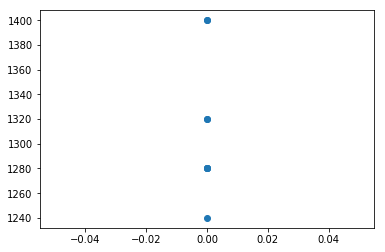

In [120]:
plt.plot(zeros_like(dP), dP, 'o')

In [125]:
TP = mean(dP); err_TP = std(dP, ddof=1)
print(f'{TP:f} +- {err_TP:f}')

1311.111111 +- 55.777335


In [126]:
lP = 1.024 # m
cP = 2 * lP / TP * 1e6 # millisekunden in sekunden
err_cP = 2 * lP / TP**2 * err_TP * 1e6
print(f'{cP:f} +- {err_cP:f}')

1562.033898 +- 66.452101


### Aluminimium

In [79]:
Al1 = [2280, 1710, 1070, 460]
Al2 = [2260, 1690, 1070, 440]
Al3 = [2270, 1700, 1050, 460]

In [111]:
diff(Al1)
diff(Al2)
diff(Al3)
dAl = abs(concatenate([diff(Al1), diff(Al2), diff(Al3)]))

array([-570, -640, -610])

array([-570, -620, -630])

array([-570, -650, -590])

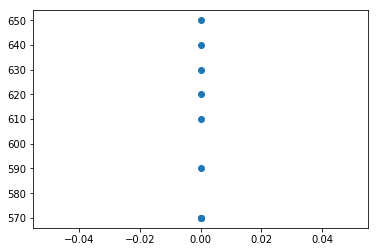

In [119]:
plt.plot(zeros_like(dAl), dAl, 'o')

In [113]:
TAl = mean(dAl); err_TAl = std(dAl, ddof=1)
print(f'{TAl:f} +- {err_TAl:f}')

605.555556 +- 31.666667


In [114]:
lAl = 1.499 # m
cAl = 2 * lAl / TAl * 1e6 # millisekunden in sekunden
err_cAl = 2 * lAl / TAl**2 * err_TAl * 1e6
print(f'{cAl:f} +- {err_cAl:f}')

4950.825688 +- 258.896389
